In [53]:
%load_ext autoreload
%autoreload 2

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

estimators = [
    ("gbr", XGBRegressor(**{'max_depth': 10, 'learning_rate': 0.07547737476917998, 'n_estimators': 511, 'min_child_weight': 8, 'gamma': 0.5040721967680127, 'subsample': 0.8037499605646387, 'colsample_bytree': 0.7390517324360482, 'reg_alpha': 0.07237873956441068, 'reg_lambda': 0.3158987021349957, 'random_state': 174})),
    ("cat", CatBoostRegressor(**{'objective': 'MAE', 'colsample_bylevel': 0.06793414629614411, 'depth': 12, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'})),
]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(),
    cv=10,
    verbose=1,
    passthrough=True,
)

In [55]:
cat_A = CatBoostRegressor(objective="MAE", random_seed=42, boosting_type="Plain", depth=7, l2_leaf_reg=2, iterations=2000)
cat_B = CatBoostRegressor(objective="MAE", random_seed=42, boosting_type="Plain", depth=7, l2_leaf_reg=2, iterations=2000)
cat_C = CatBoostRegressor(objective="MAE", random_seed=42, boosting_type="Plain", depth=7, l2_leaf_reg=2, iterations=2000)

In [56]:
%store -r dm 
dm = dm 

In [57]:
from sklearn.model_selection import train_test_split 
import pandas as pd

X = dm.data.iloc[:, 2:]
y = dm.data.iloc[:, 1]


X_A = dm.data_A.iloc[:, 3:]
y_A = dm.data_A.iloc[:, 1]
X_B = dm.data_B.iloc[:, 3:]
y_B = dm.data_B.iloc[:, 1]
X_C = dm.data_C.iloc[:, 3:]
y_C = dm.data_C.iloc[:, 1]

X_A = dm.add_location(X_A, "A")
X_B = dm.add_location(X_B, "B")
X_C = dm.add_location(X_C, "C")

X_train_A = X_A.iloc[0:int(0.7*X_A.shape[0]):]
y_train_A = y_A.iloc[0:int(0.7*y_A.shape[0]):]
X_test_A = X_A.iloc[-int(0.3*X_A.shape[0]):] 
y_test_A = y_A.iloc[-int(0.3*y_A.shape[0]):]

X_test_A, X_validate_A, y_test_A, y_validate_A = train_test_split(X_test_A, y_test_A, train_size=0.4, shuffle=False)

X_train_B = X_B.iloc[0:int(0.7*X_B.shape[0]):]
y_train_B = y_B.iloc[0:int(0.7*y_B.shape[0]):]
X_test_B = X_B.iloc[-int(0.3*X_B.shape[0]):] 
y_test_B = y_B.iloc[-int(0.3*y_B.shape[0]):] 

X_test_B, X_validate_B, y_test_B, y_validate_B = train_test_split(X_test_B, y_test_B, train_size=0.4, shuffle=False)

X_train_C = X_C.iloc[0:int(0.7*X_C.shape[0]):]
y_train_C = y_C.iloc[0:int(0.7*y_C.shape[0]):]
X_test_C = X_C.iloc[-int(0.3*X_C.shape[0]):] 
y_test_C = y_C.iloc[-int(0.3*y_C.shape[0]):] 

X_test_C, X_validate_C, y_test_C, y_validate_C = train_test_split(X_test_C, y_test_C, train_size=0.4, shuffle=False)

X_train = pd.concat([X_train_A, X_train_B, X_train_C], ignore_index=True)
X_validate = pd.concat([X_validate_A, X_validate_B, X_validate_C], ignore_index=True)
X_test = pd.concat([X_test_A, X_test_B, X_test_C], ignore_index=True)

y_train = pd.concat([y_train_A, y_train_B, y_train_C], ignore_index=True)
y_validate = pd.concat([y_validate_A, y_validate_B, y_validate_C], ignore_index=True)
y_test = pd.concat([y_test_A, y_test_B, y_test_C], ignore_index=True)

X_submission = dm.X_test_estimated[dm.X_test_estimated.columns.intersection(X.columns)]
X_submission_A = dm.X_test_estimated_a.iloc[:, 1:]
X_submission_B = dm.X_test_estimated_b.iloc[:, 1:]
X_submission_C = dm.X_test_estimated_c.iloc[:, 1:]

X_submission_A


,is_day:idx,is_in_shadow:idx,clear_sky_energy_1h:J,diffuse_rad_1h:J,direct_rad_1h:J,fresh_snow_12h:cm,fresh_snow_24h:cm,precip_5min:mm,rain_water:kgm2,snow_water:kgm2,...,total_cloud_cover:p_lagged_-1,effective_cloud_cover:p_lagged_-1,cloud_base_agl:m_lagged_-1,total_cloud_cover:p_lagged_-2,effective_cloud_cover:p_lagged_-2,cloud_base_agl:m_lagged_-2,total_cloud_cover:p_lagged_2,effective_cloud_cover:p_lagged_2,cloud_base_agl:m_lagged_2,location
0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,77.474998,77.474998,1075.100098,88.099998,88.099998,1200.400024,0.000000,0.000000,0.000000,0
1,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,88.099998,88.099998,1200.400024,68.599998,68.599998,1179.849976,0.000000,0.000000,0.000000,0
2,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,68.599998,68.599998,1179.849976,66.300003,66.300003,920.049988,74.949997,74.949997,1061.550049,0
3,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,66.300003,66.300003,920.049988,74.074997,74.074997,1419.300049,77.474998,77.474998,1075.100098,0
4,1.0,0.0,59774.500000,56574.300781,19781.400391,0.0,0.0,0.0,0.0,0.0,...,74.074997,74.074997,1419.300049,58.550003,58.550003,1299.400024,88.099998,88.099998,1200.400024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1.0,0.0,616345.375000,206803.796875,55728.199219,0.0,0.0,0.0,0.0,0.0,...,75.324997,74.599998,1610.900024,76.849998,76.125000,1622.800049,98.949997,98.925003,2749.850098,0
716,1.0,0.0,270762.812500,114295.398438,39743.699219,0.0,0.0,0.0,0.0,0.0,...,76.849998,76.125000,1622.800049,98.324997,98.224998,1767.550049,93.900002,93.724998,2499.600098,0
717,1.0,1.0,72858.703125,46269.800781,11527.099609,0.0,0.0,0.0,0.0,0.0,...,98.324997,98.224998,1767.550049,100.000000,100.000000,1438.449951,86.150002,85.574997,2013.750000,0
718,0.0,1.0,1440.199951,9402.900391,0.000000,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,1438.449951,0.000000,0.000000,0.000000,75.324997,74.599998,1610.900024,0


In [58]:
reg.fit(X, y)

0:	learn: 315.6954933	total: 78.9ms	remaining: 1m 18s
1:	learn: 311.5281399	total: 109ms	remaining: 54.3s
2:	learn: 304.2854937	total: 127ms	remaining: 42.3s
3:	learn: 300.1896594	total: 144ms	remaining: 35.8s
4:	learn: 296.3997607	total: 151ms	remaining: 30s
5:	learn: 289.2431636	total: 159ms	remaining: 26.3s
6:	learn: 281.6316271	total: 175ms	remaining: 24.9s
7:	learn: 274.7900421	total: 187ms	remaining: 23.2s
8:	learn: 271.5229185	total: 195ms	remaining: 21.5s
9:	learn: 268.2923919	total: 211ms	remaining: 20.9s
10:	learn: 265.2166887	total: 224ms	remaining: 20.2s
11:	learn: 258.5358327	total: 239ms	remaining: 19.7s
12:	learn: 256.0986728	total: 243ms	remaining: 18.5s
13:	learn: 249.9194722	total: 257ms	remaining: 18.1s
14:	learn: 243.8734155	total: 263ms	remaining: 17.2s
15:	learn: 237.8819292	total: 277ms	remaining: 17s
16:	learn: 232.3762246	total: 290ms	remaining: 16.8s
17:	learn: 230.0910113	total: 305ms	remaining: 16.7s
18:	learn: 224.7452436	total: 326ms	remaining: 16.8s
19:	l

StackingRegressor(cv=10,
                  estimators=[('gbr',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.7390517324360482,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=0.5040721967680127,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            intera...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=10,
                                            max_leaves=None, min_child_weight=8,
                                            missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=511, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=174, ...)),
                              ('cat',
                               <catboost.core.CatBoostRegressor object at 0x287a36370>)],
                  final_estimator=LinearRegression(), passthrough=True,
                  verbose=1)

In [59]:
cat_A.fit(X_A, y_A)
cat_B.fit(X_B, y_B)
cat_C.fit(X_C, y_C)

0:	learn: 616.3545629	total: 10.9ms	remaining: 21.9s
1:	learn: 601.4991005	total: 19ms	remaining: 19s
2:	learn: 588.7906518	total: 25.7ms	remaining: 17.1s
3:	learn: 573.2170159	total: 33.6ms	remaining: 16.8s
4:	learn: 559.3010554	total: 41.8ms	remaining: 16.7s
5:	learn: 545.5285942	total: 49.6ms	remaining: 16.5s
6:	learn: 533.0940851	total: 57.8ms	remaining: 16.5s
7:	learn: 520.1731350	total: 65.8ms	remaining: 16.4s
8:	learn: 508.4499061	total: 74.2ms	remaining: 16.4s
9:	learn: 495.7658738	total: 82ms	remaining: 16.3s
10:	learn: 484.6550306	total: 90.4ms	remaining: 16.4s
11:	learn: 473.4049192	total: 98.3ms	remaining: 16.3s
12:	learn: 463.4622178	total: 106ms	remaining: 16.2s
13:	learn: 454.1419082	total: 114ms	remaining: 16.2s
14:	learn: 444.7065924	total: 122ms	remaining: 16.2s
15:	learn: 435.5184612	total: 130ms	remaining: 16.1s
16:	learn: 426.2458613	total: 137ms	remaining: 16s
17:	learn: 416.8785179	total: 145ms	remaining: 16s
18:	learn: 408.9847851	total: 153ms	remaining: 16s
19:

In [60]:
## Specify the model to be used
import numpy as np
import pandas as pd

reg_pred = pd.DataFrame(reg.predict(X_submission))

## Specify the model to be used
pred_A = pd.DataFrame(cat_A.predict(X_submission_A))
pred_B = pd.DataFrame(cat_B.predict(X_submission_B))
pred_C = pd.DataFrame(cat_C.predict(X_submission_C))
 
df = pd.concat([pred_A, pred_B, pred_C], ignore_index=True)

pred = pd.DataFrame(0.4*np.array(reg_pred) + 0.6*np.array(df))

pred[pred<0] = 0

# # NAME THE FILE 
pred.to_csv("catXstack_20.csv")

pred


,0
0,0.000000
1,0.000000
2,0.000000
3,54.784931
4,333.773688
...,...
2155,45.083913
2156,3.955552
2157,0.000000
2158,7.946301


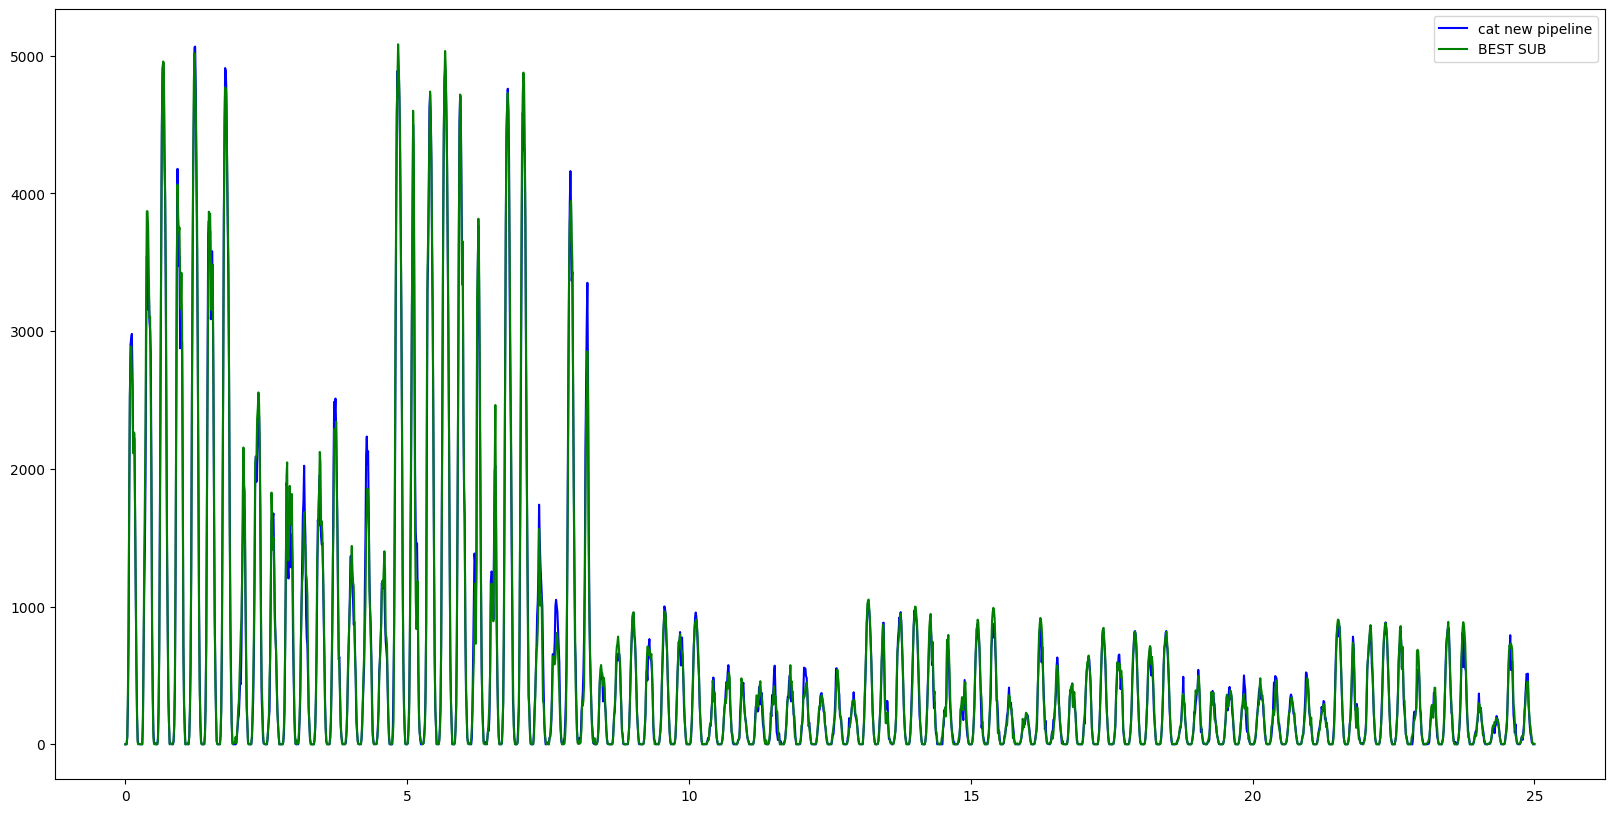

120022.38821142916


In [7]:
import matplotlib.pyplot as plt 
import csv 
import numpy as np 
import pandas as pd
from sklearn.metrics import mean_absolute_error
stack1_pred = pd.read_csv("stack_1.csv")
stack2_pred = pd.read_csv("stack_2.csv")
stack3_pred = pd.read_csv("stack_3.csv")
stack5_pred = pd.read_csv("stack_5.csv")
cat2_pred = pd.read_csv("catboost_2.csv")
cat3_pred = pd.read_csv("catboost_3.csv")
cat4_pred = pd.read_csv("catboost_4.csv")
cat10_pred = pd.read_csv("catboost_10.csv")
cat11_pred = pd.read_csv("catboost_11.csv")
cat12_pred = pd.read_csv("catboost_12.csv")
cat13_pred = pd.read_csv("catboost_13_single.csv")
cat15_pred = pd.read_csv("catboost_15_single.csv")
cat20_pred = pd.read_csv("catboost_20_A_BC.csv")
cat22_pred = pd.read_csv("catboost_22_single.csv")
cat30_pred = pd.read_csv("catboost_30_single.csv")
cat31_pred = pd.read_csv("catboost_31_single.csv")
cat_1_sep = pd.read_csv("catboost_1_seperate.csv")
cat_50_sep = pd.read_csv("catboost_50_sep.csv")
log4_pred = pd.read_csv("log_sub_4.csv")
best_pred = pd.read_csv("catboost_1.csv")

diff = pd.DataFrame(stack2_pred) - pd.DataFrame(best_pred)

x = np.linspace(0, 25, 3*720)
y = [] 
  
with open('catboost_31_single.csv','r') as csvfile: 
    plots = csv.reader(csvfile, delimiter = ',') 

    plots.__next__()
    i = 1
      
    for row in plots: 
        y.append(float(row[1])) 
        # i += 1

        # if ( i == 721): 
        #     break
            
        
# plt.legend()


y2 = []

with open('catboost_1.csv','r') as csvfile: 
    plots = csv.reader(csvfile, delimiter = ',') 

    plots.__next__()
    i = 1
      
    for row in plots: 
        y2.append(float(row[1])) 
        # i += 1

        # if ( i == 721): 
        #     break
            
        
fig, axs = plt.subplots(1, 1, figsize=(20, 10))
plt.plot(x, y, color = 'b', label="cat new pipeline") 

plt.plot(x, y2, color = 'g', label="BEST SUB") 

plt.legend() 
plt.show()



print(abs(np.array(best_pred) - np.array(cat_50_sep)).sum())

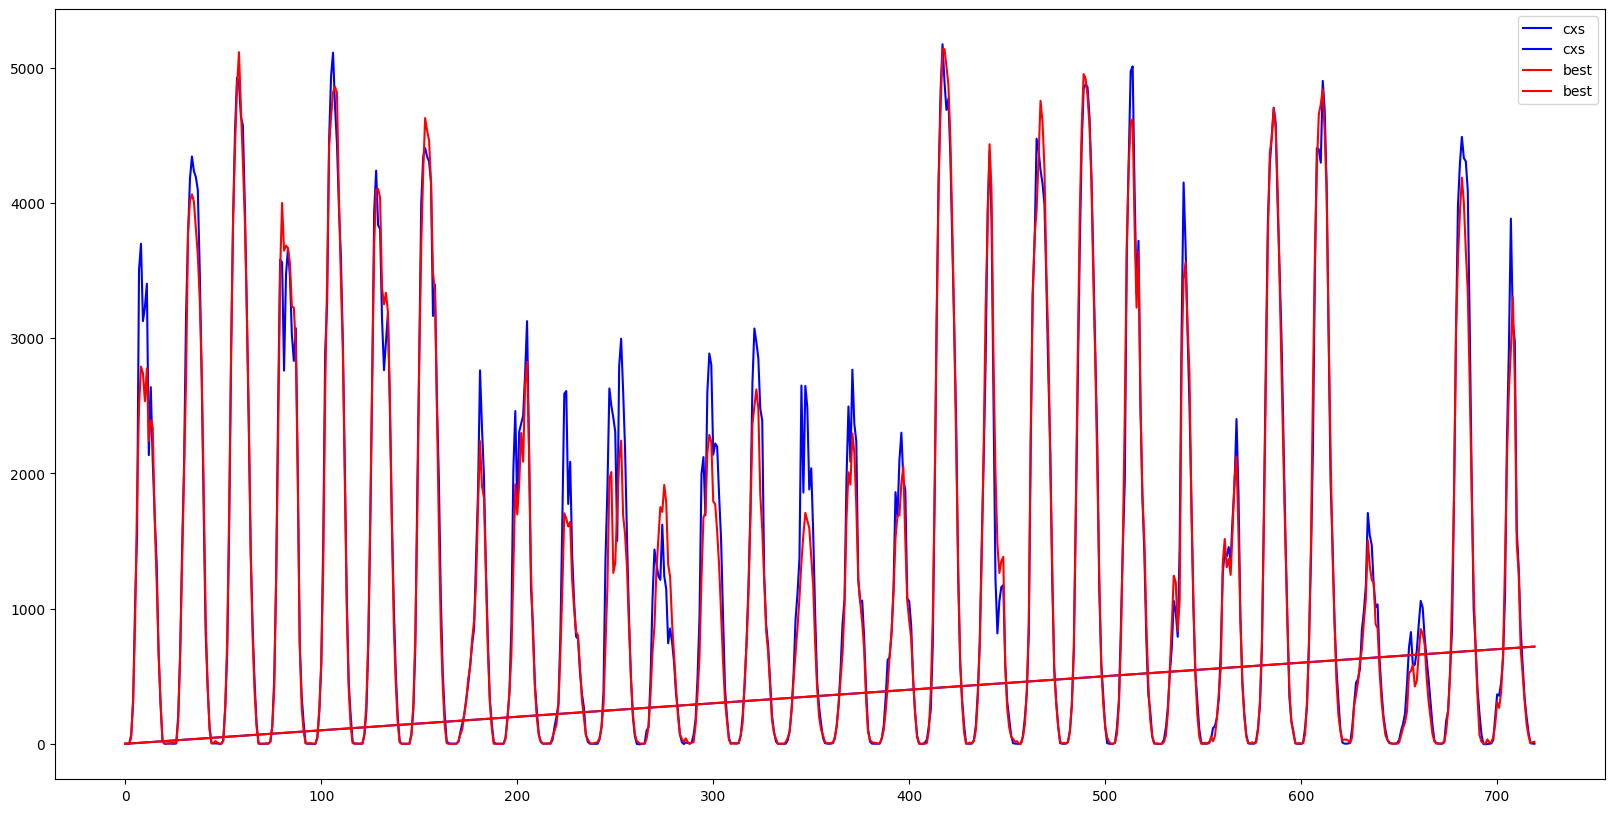

28.30506188497417


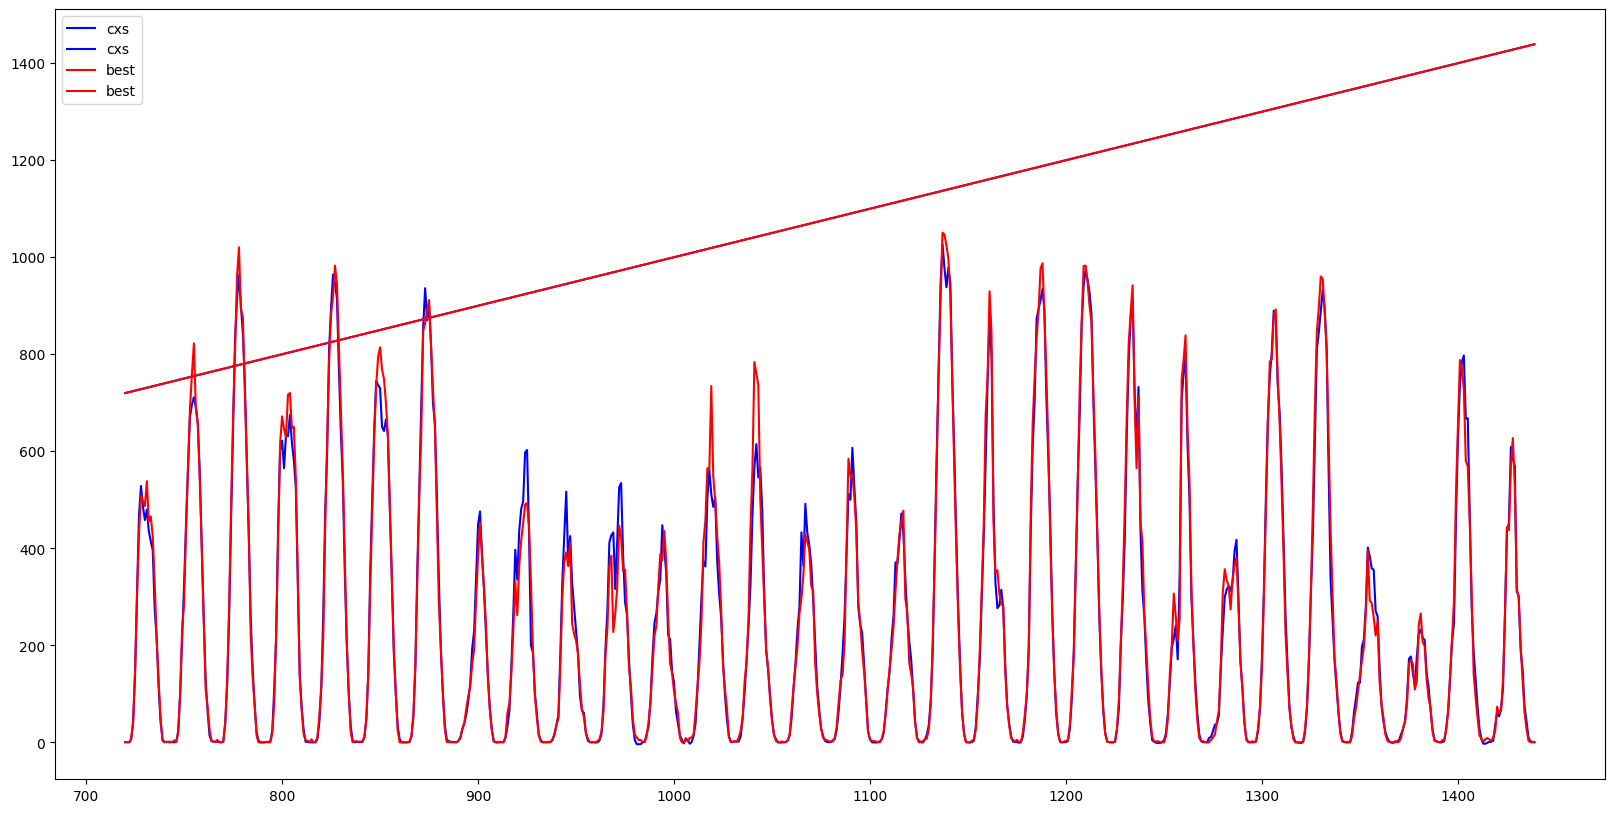

28.30506188497417


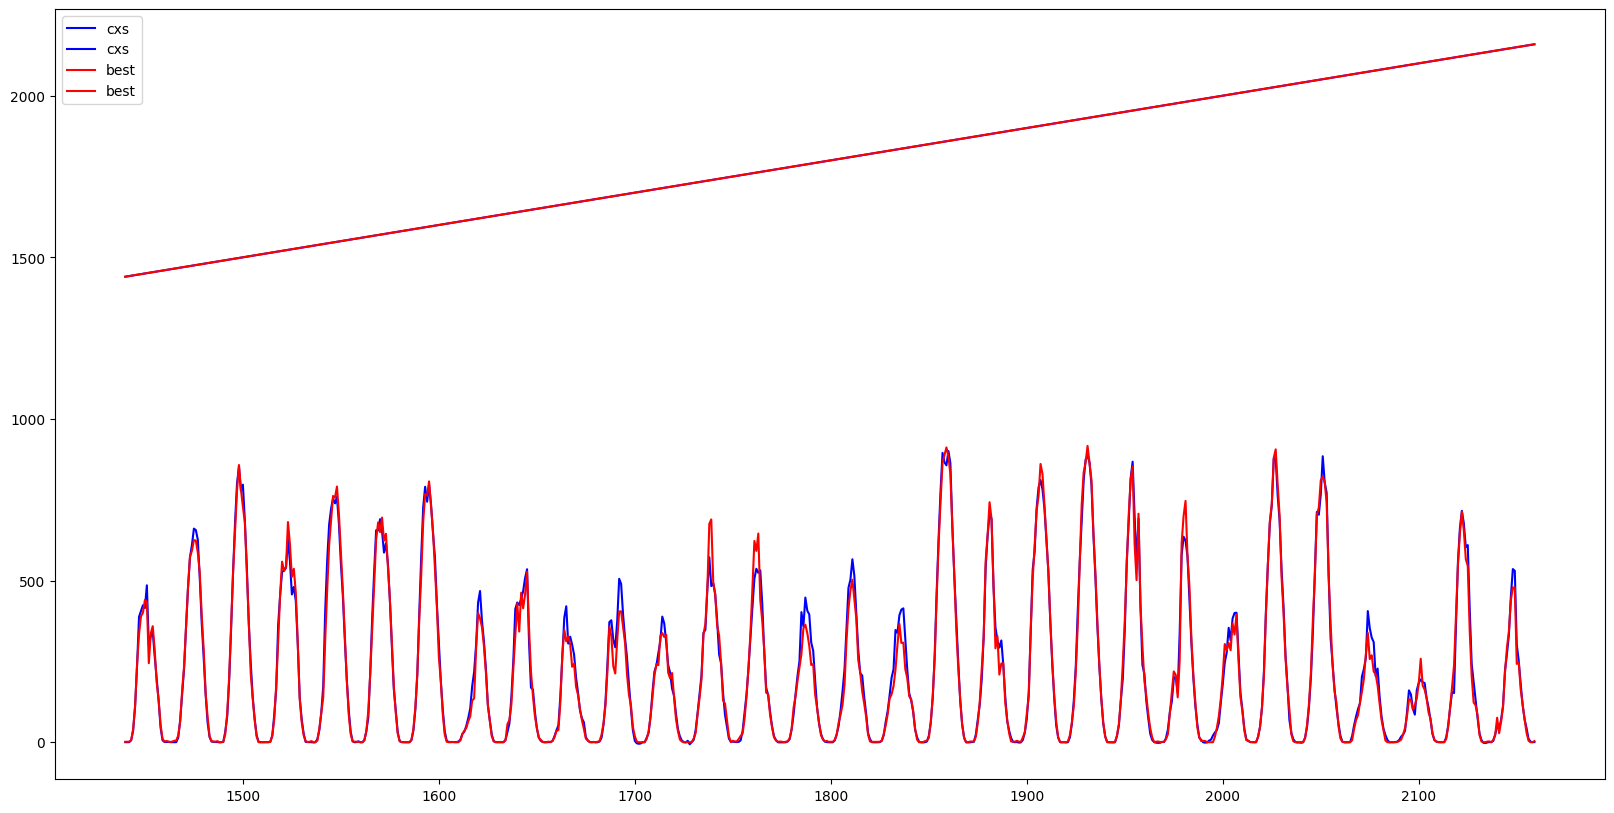

28.30506188497417


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

cxs = pd.read_csv("gluon_best_01_combined.csv")

best = pd.read_csv("catxcat.csv")


fig, axs = plt.subplots(1, 1, figsize=(20, 10))

plt.plot(cxs[0*720:1*720], color = 'b', label="cxs") 
plt.plot(best[0*720:1*720], color = 'r', label="best") 
plt.legend()
plt.show()
print(mean_absolute_error(cxs, best))
fig, axs = plt.subplots(1, 1, figsize=(20, 10))

plt.plot(cxs[1*720:2*720], color = 'b', label="cxs") 
plt.plot(best[1*720:2*720], color = 'r', label="best") 
plt.legend()
plt.show()
print(mean_absolute_error(cxs, best))

fig, axs = plt.subplots(1, 1, figsize=(20, 10))

plt.plot(cxs[2*720:3*720], color = 'b', label="cxs") 
plt.plot(best[2*720:3*720], color = 'r', label="best") 
plt.legend()
plt.show()
print(mean_absolute_error(cxs, best))




In [49]:
cxs = pd.read_csv("gluon_best_01_combined.csv")
cxs = cxs.iloc[:, 1:]

stack = pd.read_csv("catXstack_1.csv")
stack = stack.iloc[:,1:]

In [50]:

preds = 0.5*cxs + 0.5*stack 

In [51]:
preds[preds<0] = 0.0
preds.to_csv("inshalla.csv")

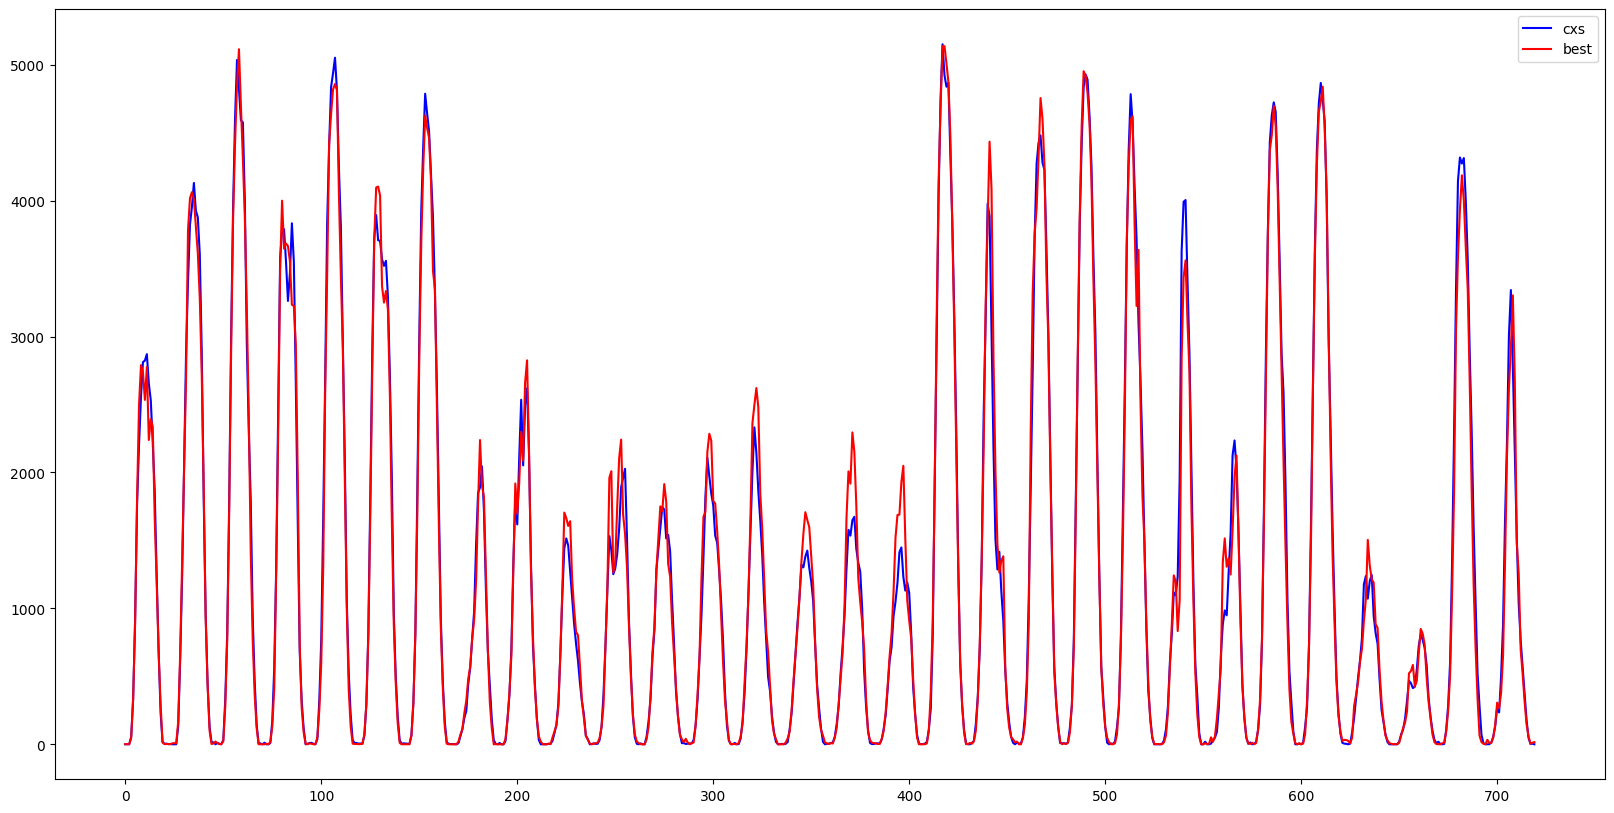

52.24694795756486


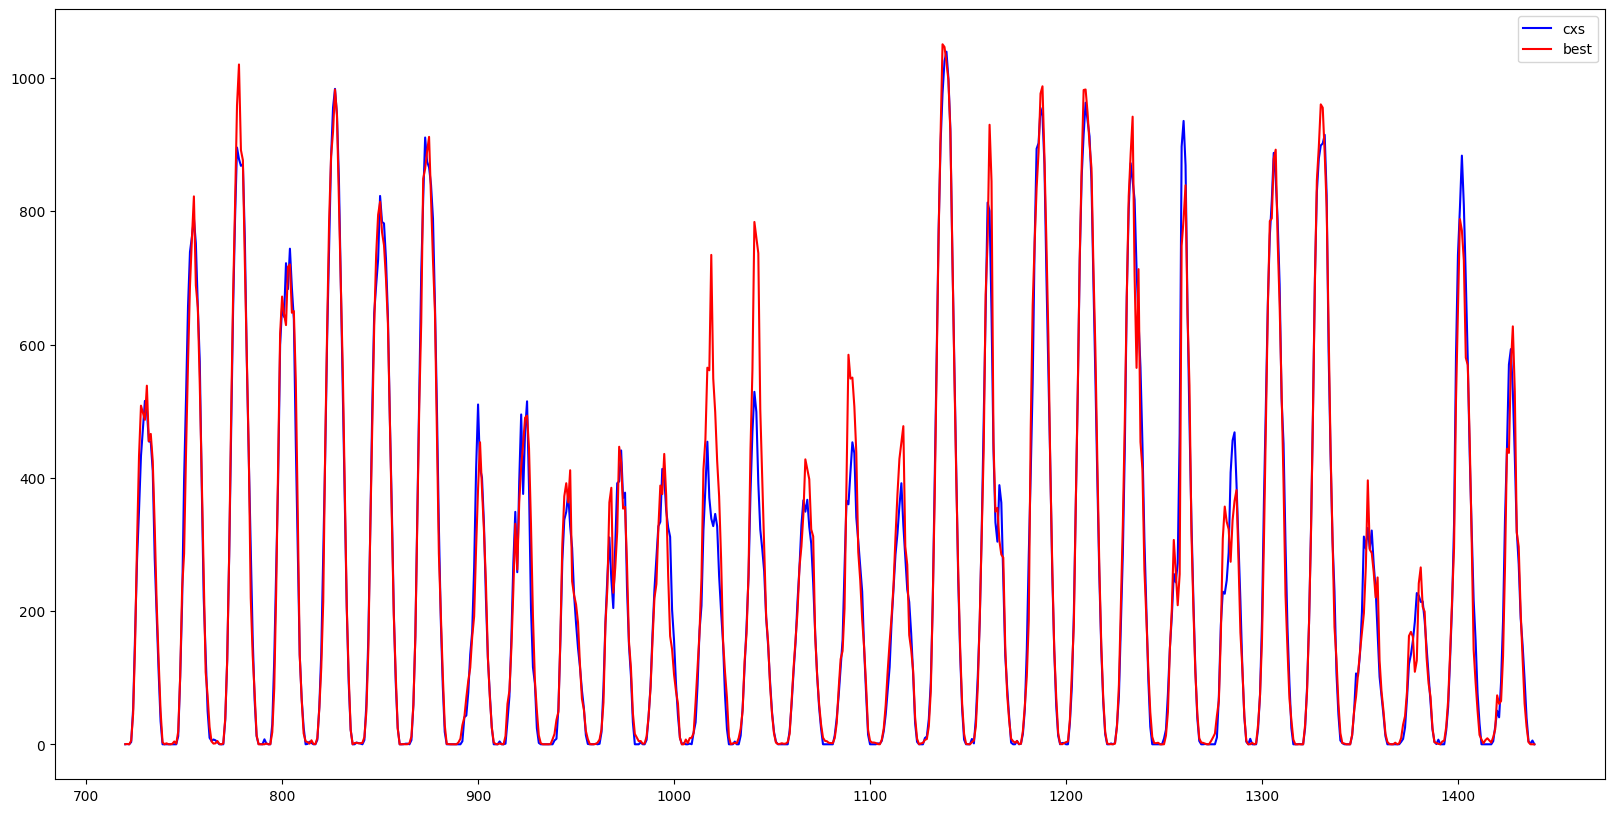

52.24694795756486


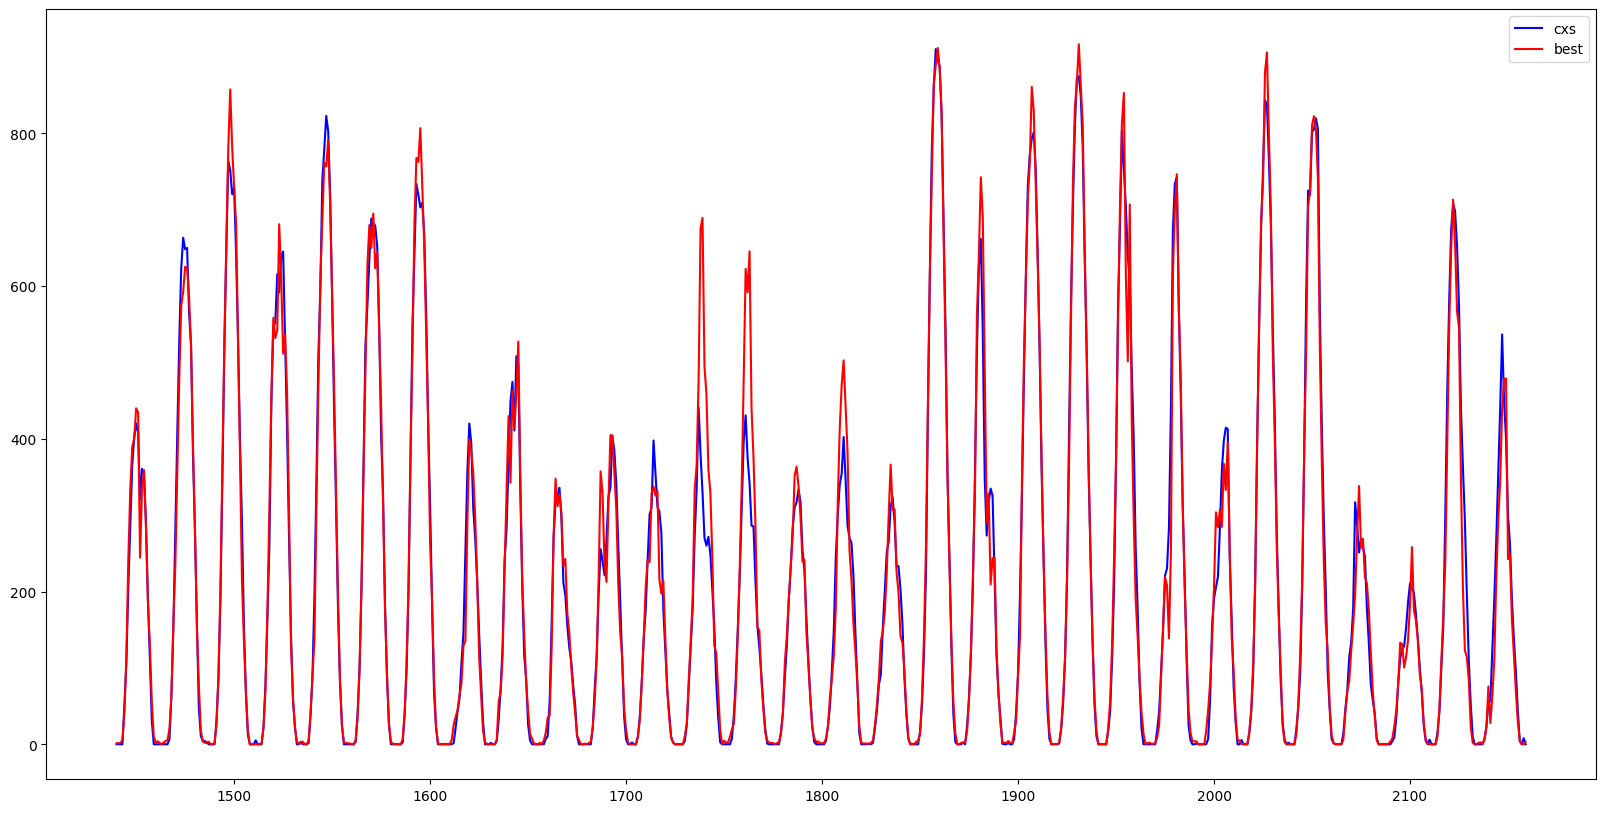

52.24694795756486


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

cxs = pd.read_csv("catXstack_20.csv")
cxs = cxs.iloc[:,1:]

cxs[cxs<0] = 0.0

best = pd.read_csv("catxcat.csv")
best = best.iloc[:, 1:]


fig, axs = plt.subplots(1, 1, figsize=(20, 10))

plt.plot(cxs[0*720:1*720], color = 'b', label="cxs") 
plt.plot(best[0*720:1*720], color = 'r', label="best") 
plt.legend()
plt.show()
print(mean_absolute_error(cxs, best))
fig, axs = plt.subplots(1, 1, figsize=(20, 10))

plt.plot(cxs[1*720:2*720], color = 'b', label="cxs") 
plt.plot(best[1*720:2*720], color = 'r', label="best") 
plt.legend()
plt.show()
print(mean_absolute_error(cxs, best))

fig, axs = plt.subplots(1, 1, figsize=(20, 10))

plt.plot(cxs[2*720:3*720], color = 'b', label="cxs") 
plt.plot(best[2*720:3*720], color = 'r', label="best") 
plt.legend()
plt.show()
print(mean_absolute_error(cxs, best))

